# Thinking in Systems

## Table of Contents

- [Bathtub](#Bathtub)
- [Coffee Cup](#Coffee-Cup)
- [Bank Account](#Bank-Account)
- [Thermostat](#Thermostat)
- [ ] [Population](#Population)
- [ ] [Capital](#Capital)
- [ ] [Business Inventory](#Business-Inventory)
- [ ] [A Renewable Stock Constrained by a Non-Renewable Resource](#A-Renewable-Stock-Constrained-by-a-Non-Renewable-Resource)
- [ ] [A Renewable Stock Constrained by a Renewable Resource](#A-Renewable-Stock-Constrained-by-a-Renewable-Resource)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Bathtub

From the book, appendix *Model Equations*:

> Stock: *water in tub(t) = water in tub(t – dt) + (inflow – outflow) x dt* \
> Initial stock value: *water in tub* = 50 gal\
> *t* = minutes\
> *dt* = 1 minute\
> Run time = 10 minutes\
> Inflow: *inflow* = 0 gal/min . . . for time 0 to 5; 5 gal/min . . . for time 6 to 10\
> Outflow: *outflow* = 5 gal/min

or more concise and mathematical

$$ W(t) = W(t-dt) + (F_\text{in} - F_\text{out})\cdot dt $$

We can re-arrange this into

$$ \frac{W(t) - W(t-dt)}{dt} = F_\text{in}(t) - F_\text{out}(t) $$

and rename $W(t) - W(t-dt)$ to $dW(t)$, and it turns out it's a differential equation

$$ \frac{d}{dt}W(t) = F_\text{in}(t) - F_\text{out}(t) $$

From looking at the differential equation, we can derive the following behaviours of the **Bathtub system**: 
- the rate of change of the water, or $\frac{d}{dt}W(t)$, is zero if inflow and outflow are equal; this is called an "equilibrium"
- the rate of change of the water is positive (negative) if inflow is larger (smaller) than the outflow; this makes sense when we think in terms of filling or emptying the bathtub

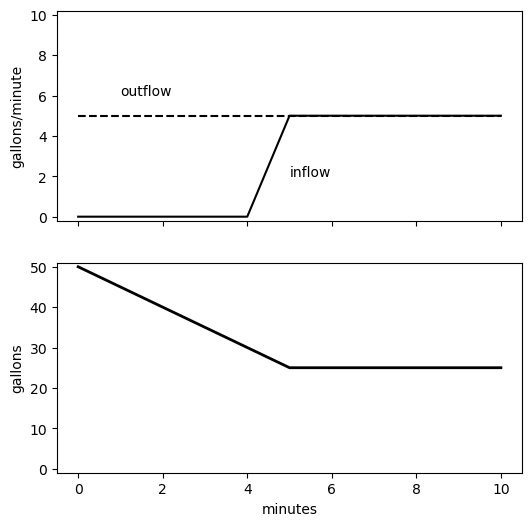

In [2]:
def F_IN(t):
    if t < 5:
        return 0
    else:
        return 5
    
def F_OUT(t):
    return 5

W0 = 50
dt = 1
max_time = 10

W = [W0]
inflow  = [F_IN(0)]
outflow = [F_OUT(0)]
time = np.arange(0,max_time+dt,dt)

# solving the descriptive and discretized formula iteratively
for t in time[1:]:
    new_W = W[-1] + (inflow[-1] - outflow[-1])*dt
    W.append(new_W)
    inflow.append(F_IN(t))
    outflow.append(F_OUT(t))

# plotting (inflow/outflow & bathtub volume)
fig, ax = plt.subplots(2,1,figsize=(6,6),sharex=True)

ax[0].plot(time,outflow,'k--')
ax[0].text(1,6,"outflow")
ax[0].plot(time,inflow,'k-')
ax[0].text(5,2,"inflow")
ax[0].set_ylabel("gallons/minute")
ax[0].set_ylim(-0.2,10.2)

ax[1].plot(time,W,'k-',lw=2)
ax[1].set_ylim(-1,51)
ax[1].set_ylabel("gallons")
ax[1].set_xlabel("minutes");

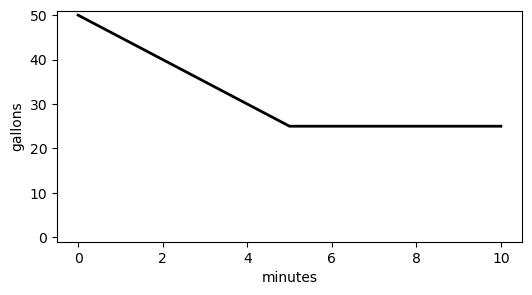

In [3]:
# solving the equation with `odeint`
# the right-hand-side of our differential equation
def dWdt(W,t):
    return F_IN(t) - F_OUT(t)

sol_W = odeint(dWdt, W0, time)

# plotting (inflow/outflow & bathtub volume)
fig, ax = plt.subplots(1,1,figsize=(6,3))

ax.plot(time,sol_W,'k-',lw=2)
ax.set_ylim(-1,51)
ax.set_ylabel("gallons")
ax.set_xlabel("minutes");

# Coffee Cup

> ### Cooling
> Stock: *coffee temperature(t) = coffee temperature(t – dt) – (cooling x dt)* \
> Initial stock value: *coffee temperature* = 100°C, 80°C, and 60°C . . . for \
> three comparative model runs. \
> *t* = minutes \
> *dt* = 1 minute \
> Run time = 8 minutes \
> Outflow: *cooling = discrepancy* x 10% \
> Converters: *discrepancy = coffee temperature – room temperature* \
> *room temperature* = 18°C
> ### Warming
> Stock: *coffee temperature(t) = coffee temperature(t – dt) + (heating x dt)* \
> Initial stock value: *coffee temperature* = 0°C, 5°C, and 10°C . . . for three \
> comparative model runs. \
> *t* = minutes \
> *dt* = 1 minute \
> Run time = 8 minutes \
> Inflow: *heating = discrepancy* x 10% \
> Converters: *discrepancy = room temperature – coffee temperature* \
> *room temperature* = 18°C

or more concise and methematical

$$ T_\text{coffee}(t) = T_\text{coffee}(t – dt) - k(T_\text{room} - T_\text{coffee}) \cdot dt \quad \text{with} \quad k = 10\% $$

We can re-arrange this into

$$ \frac{T_\text{coffee}(t) - T_\text{coffee}(t-dt)}{dt} = \frac{dT_\text{coffee}(t)}{dt} =  - k(T_\text{room} - T_\text{coffee}) $$

or, with $T_\text{coffee}(t) - T_\text{coffee}(t-dt) = dT_\text{coffee}(t)$, as

$$ \frac{d}{dt} T_\text{coffee}(t) =  - k(T_\text{room} - T_\text{coffee}) $$

From looking at the differential equation, we can derive the following behaviours of the **Coffee Cup system**:
- The coffee temperature doesn't change once it has reached the room temperature
- The rate of change for the coffee temperature becomes smaller the closer it gets to the room temperature
- The rate of change is largest for coffee temperatures furthest away from the room temperature

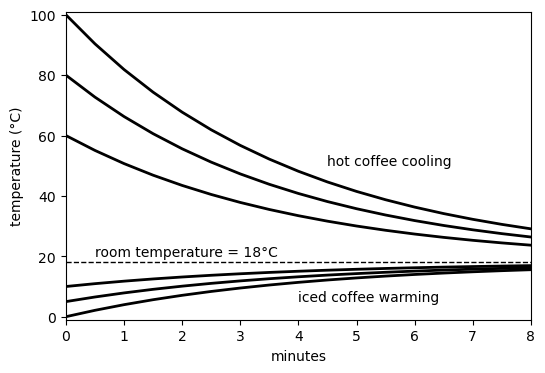

In [4]:
dt = 0.5
max_time = 8
time = np.arange(0,max_time+dt,dt)

def dTdt(T_coffee, t, k, T_room):
    return -k*(T_coffee-T_room)

# plotting coffee temperatures
fig, ax = plt.subplots(1,1,figsize=(6,4))

T_room = 18
k = 0.25 # I think the 10% number from the book's appendix is wrong, likely 25%

ax.axhline(T_room,ls='--',color='k',lw=1)

for T0_coffee in [100,80,60,0,5,10]:
    sol_T = odeint(dTdt, T0_coffee, time, (k, T_room))
    ax.plot(time,sol_T,'k-',lw=2)
ax.set_ylim(-1,101)
ax.set_xlim(0,max_time)
ax.set_ylabel("temperature (°C)")
ax.set_xlabel("minutes");
ax.text(0.5,T_room+2,f"room temperature = {T_room}°C")
ax.text(4.5,50,"hot coffee cooling")
ax.text(4.,5,"iced coffee warming");

# Bank Account

> Stock: *money in bank account(t) = money in bank account(t – dt) + (interest added x dt)* \
> Initial stock value: *money in bank account* = \\$100 \
> *t* = years \
> *dt* = 1 year \
> Run time = 12 years \
> Inflow: *interest added* (\\$/year) = *money in bank account* x *interest rate* \
> Converter: *interest rate* = 2%, 4%, 6%, 8%, & 10% annual interest . . . for \
> five comparative model runs.

With a little practice, we can now directly derive the differential equation for this system, with money $M(t)$ and interest rate $i$:

$$ \frac{d}{dt} M(t) = M(t) \cdot i $$

From looking at the differential equation, we can derive the following behaviours of the **Bank Account system**:
- For zero interest rates $i$, the amount of money in the bank account remains the same
- The amount of money added each year depends on the how much money we start with and on the interest rates

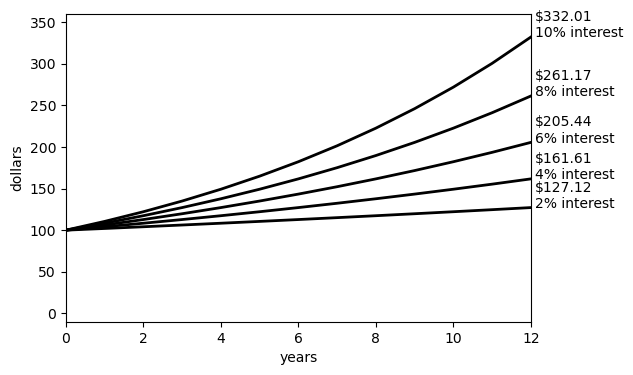

In [5]:
dt = 1.0
max_time = 12
time = np.arange(0,max_time+dt,dt)

def dMdt(M, t, i):
    return M*i

# plotting money in bank account over time
# The numbers are different from the book (but correct!)
fig, ax = plt.subplots(1,1,figsize=(6,4))

M0 = 100

for i in [0.02,0.04,0.06,0.08,0.1]:
    sol_M = odeint(dMdt, M0, time, (i,))
    ax.plot(time,sol_M,'k-',lw=2)
    ax.text(12.1,sol_M[-1,0],f"${sol_M[-1,0]:.2f}\n{int(i*100)}% interest")
ax.set_ylim(-10,360)
ax.set_xlim(0,max_time)
ax.set_ylabel("dollars")
ax.set_xlabel("years");

# Thermostat

> Stock: *room temperature(t) = room temperature(t – dt) + (heat from furnace – heat to outside) x dt* \
> Initial stock value: *room temperature* = 10°C for cold room warming; 18°C for warm room cooling \
> *t* = hours \
> *dt* = 1 hour \
> Run time = 8 hours and 24 hours \
> Inflow: *heat from furnace* = minimum of *discrepancy between desired and actual room temperature* or 5 \
> Outflow: *heat to outside* = *discrepancy between inside and outside temperature* x 10% . . . for “normal” house; *discrepancy between inside and outside temperature* x 30% . . . for very leaky house \
> Converters: *thermostat setting* = 18°C \
> *discrepancy between desired and actual room temperature* = maximum of (*thermostat setting* – *room temperature*) or 0 \
> *discrepancy between inside and outside temperature* = *room temperature* – 10°C . . . for constant outside temperature (Figures 16 – 18); > *room temperature* – 24-hour outside temp . . . for full day and night cycle (Figures 19 and 20) \
> *24-hour outside temp* ranges from 10°C (50°F) during the day to – 5°C (23°F) at night, as shown in graph

The corresponding differential equation is

$$ \frac{d}{dt}T_\text{room} = H_\text{furnace} - H_\text{outside} $$ 

From looking at the differential equation, we can derive the following behaviours of the **Thermostat system**:

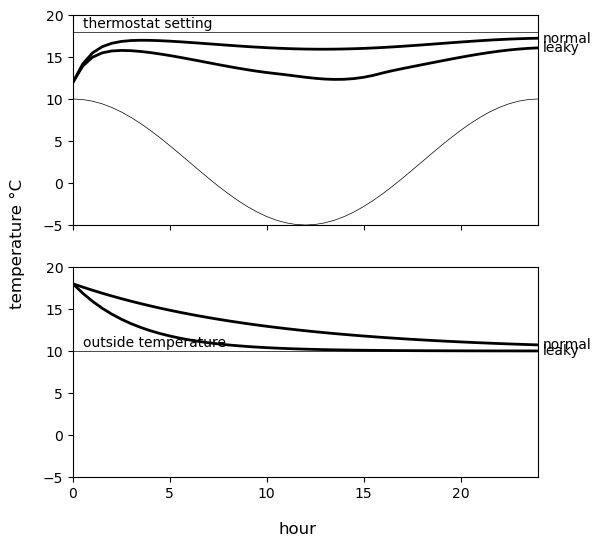

In [6]:
dt = 0.5
max_time = 24
time = np.arange(0,max_time+dt,dt)

T_outside_is_constant = True

def T_outside(t):
    if T_outside_is_constant:
        return 10.0+0*t
    else:
        return 7.5*np.cos(np.pi*t/12)+2.5

def dTdt(T_room, t, T_thermostat, leak):
    H_outside = (T_room - T_outside(t))*leak
    H_furnace = min(max(T_thermostat - T_room,0),5)
    return H_furnace - H_outside

# plotting room temperature over time
fig, ax = plt.subplots(2,1,figsize=(6,6),sharex=True,sharey=True)

ax[0].set_ylim(-5,20)
ax[0].set_xlim(0,max_time)
fig.supylabel("temperature °C")
fig.supxlabel("hour")

T0_room = 12
T_thermostat = 18

status = {"normal": 0.1, "leaky": 0.3}

T_outside_is_constant = False

for s,leak in status.items():
    sol_T = odeint(dTdt, T0_room, time, (T_thermostat, leak))
    ax[0].plot(time,sol_T,'k-',lw=2)
    ax[0].text(max_time*1.01,sol_T[-1],s,va="center")
ax[0].axhline(T_thermostat,ls='-',color='k',lw=0.5)
ax[0].text(0.5,T_thermostat+0.5,"thermostat setting")
ax[0].plot(time,T_outside(time),'k-',lw=0.5)

T_outside_is_constant = True
T0_room = 18
T_thermostat = 10
for s,leak in status.items():
    sol_T = odeint(dTdt, T0_room, time, (T_thermostat, leak))
    ax[1].plot(time,sol_T,'k-',lw=2)
    ax[1].text(max_time*1.01,sol_T[-1],s,va="center")
ax[1].plot(time,T_outside(time),'k-',lw=0.5)
ax[1].text(0.5,T_outside(0.5)+0.5,"outside temperature");

# Population

> Stock: *population(t) = population(t – dt) + (births – deaths) x dt* \
> Initial stock value: *population* = 6.6 billion people \
> *t* = years \
> *dt* = 1 year \
> Run time = 100 years \
> Inflow: *births* = *population* x *fertility* \
> Outflow: *deaths* = *population* x *mortality* \
> Converters:
>
> Figure 22: \
> *mortality* = .009 . . . or 9 deaths per 1000 population \
> *fertility* = .021 . . . or 21 births per 1000 population \
>
> Figure 23: \
> *mortality* = .030 \
> *fertility* = .021 \
>
> Figure 24: \
> *mortality* = .009 \
> *fertility* starts at .021 and falls over time to .009 as shown in graph
> 
> Figure 26: \
> *mortality* = .009 \
> *fertility* starts at .021, drops to .009, but then rises .030 as shown in graph

...coming soon

# Capital

...coming soon

# Business Inventory

...coming soon

# A Renewable Stock Constrained by a Non-Renewable Resource

...coming soon

# A Renewable Stock Constrained by a Renewable Resource
...coming soon